# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [2]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [5]:
DATASET_PATH = '../data/college_student_placement_dataset.csv'
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [6]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, 'r') as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [10]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [11]:
# Identify which columns have null values. 

null_counts = df.isnull().sum()
print(null_counts)

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


## Duplicate Rows Check
If so, remove the duplicates.

In [12]:
# Check to see if our data has any duplicate rows.

dup_counts = df.duplicated().sum()
print(dup_counts)

0


Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [14]:
non_numeric = df.select_dtypes(exclude=['number']).columns
print(non_numeric)

Index(['College_ID', 'Internship_Experience', 'Placement'], dtype='object')


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [17]:
bin_map = {'Yes': 1, 'No': 0}

df['Internship_Numeric'] = df['Internship_Experience'].replace(bin_map)
df['Placement_Numeric'] = df['Placement'].replace(bin_map)

df['College_ID_Numeric'] = df['College_ID'].str.replace('CLG', '').astype(int)

print(df[['College_ID', 'College_ID_Numeric', 'Internship_Experience', 'Internship_Numeric', 'Placement', 'Placement_Numeric']].head())

  College_ID  College_ID_Numeric Internship_Experience  Internship_Numeric  \
0    CLG0030                  30                    No                   0   
1    CLG0061                  61                    No                   0   
2    CLG0036                  36                    No                   0   
3    CLG0055                  55                   Yes                   1   
4    CLG0004                   4                    No                   0   

  Placement  Placement_Numeric  
0        No                  0  
1        No                  0  
2        No                  0  
3        No                  0  
4        No                  0  


/tmp/ipykernel_8790/1349172452.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internship_Numeric'] = df['Internship_Experience'].replace(bin_map)
/tmp/ipykernel_8790/1349172452.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement_Numeric'] = df['Placement'].replace(bin_map)


❔ When should you use this versus using `pd.get_dummies`?

ANS: Use pd.get_dummies when converting categorical data into numerical

# Visualization with `sns.pairplot`

<Figure size 1300x800 with 0 Axes>

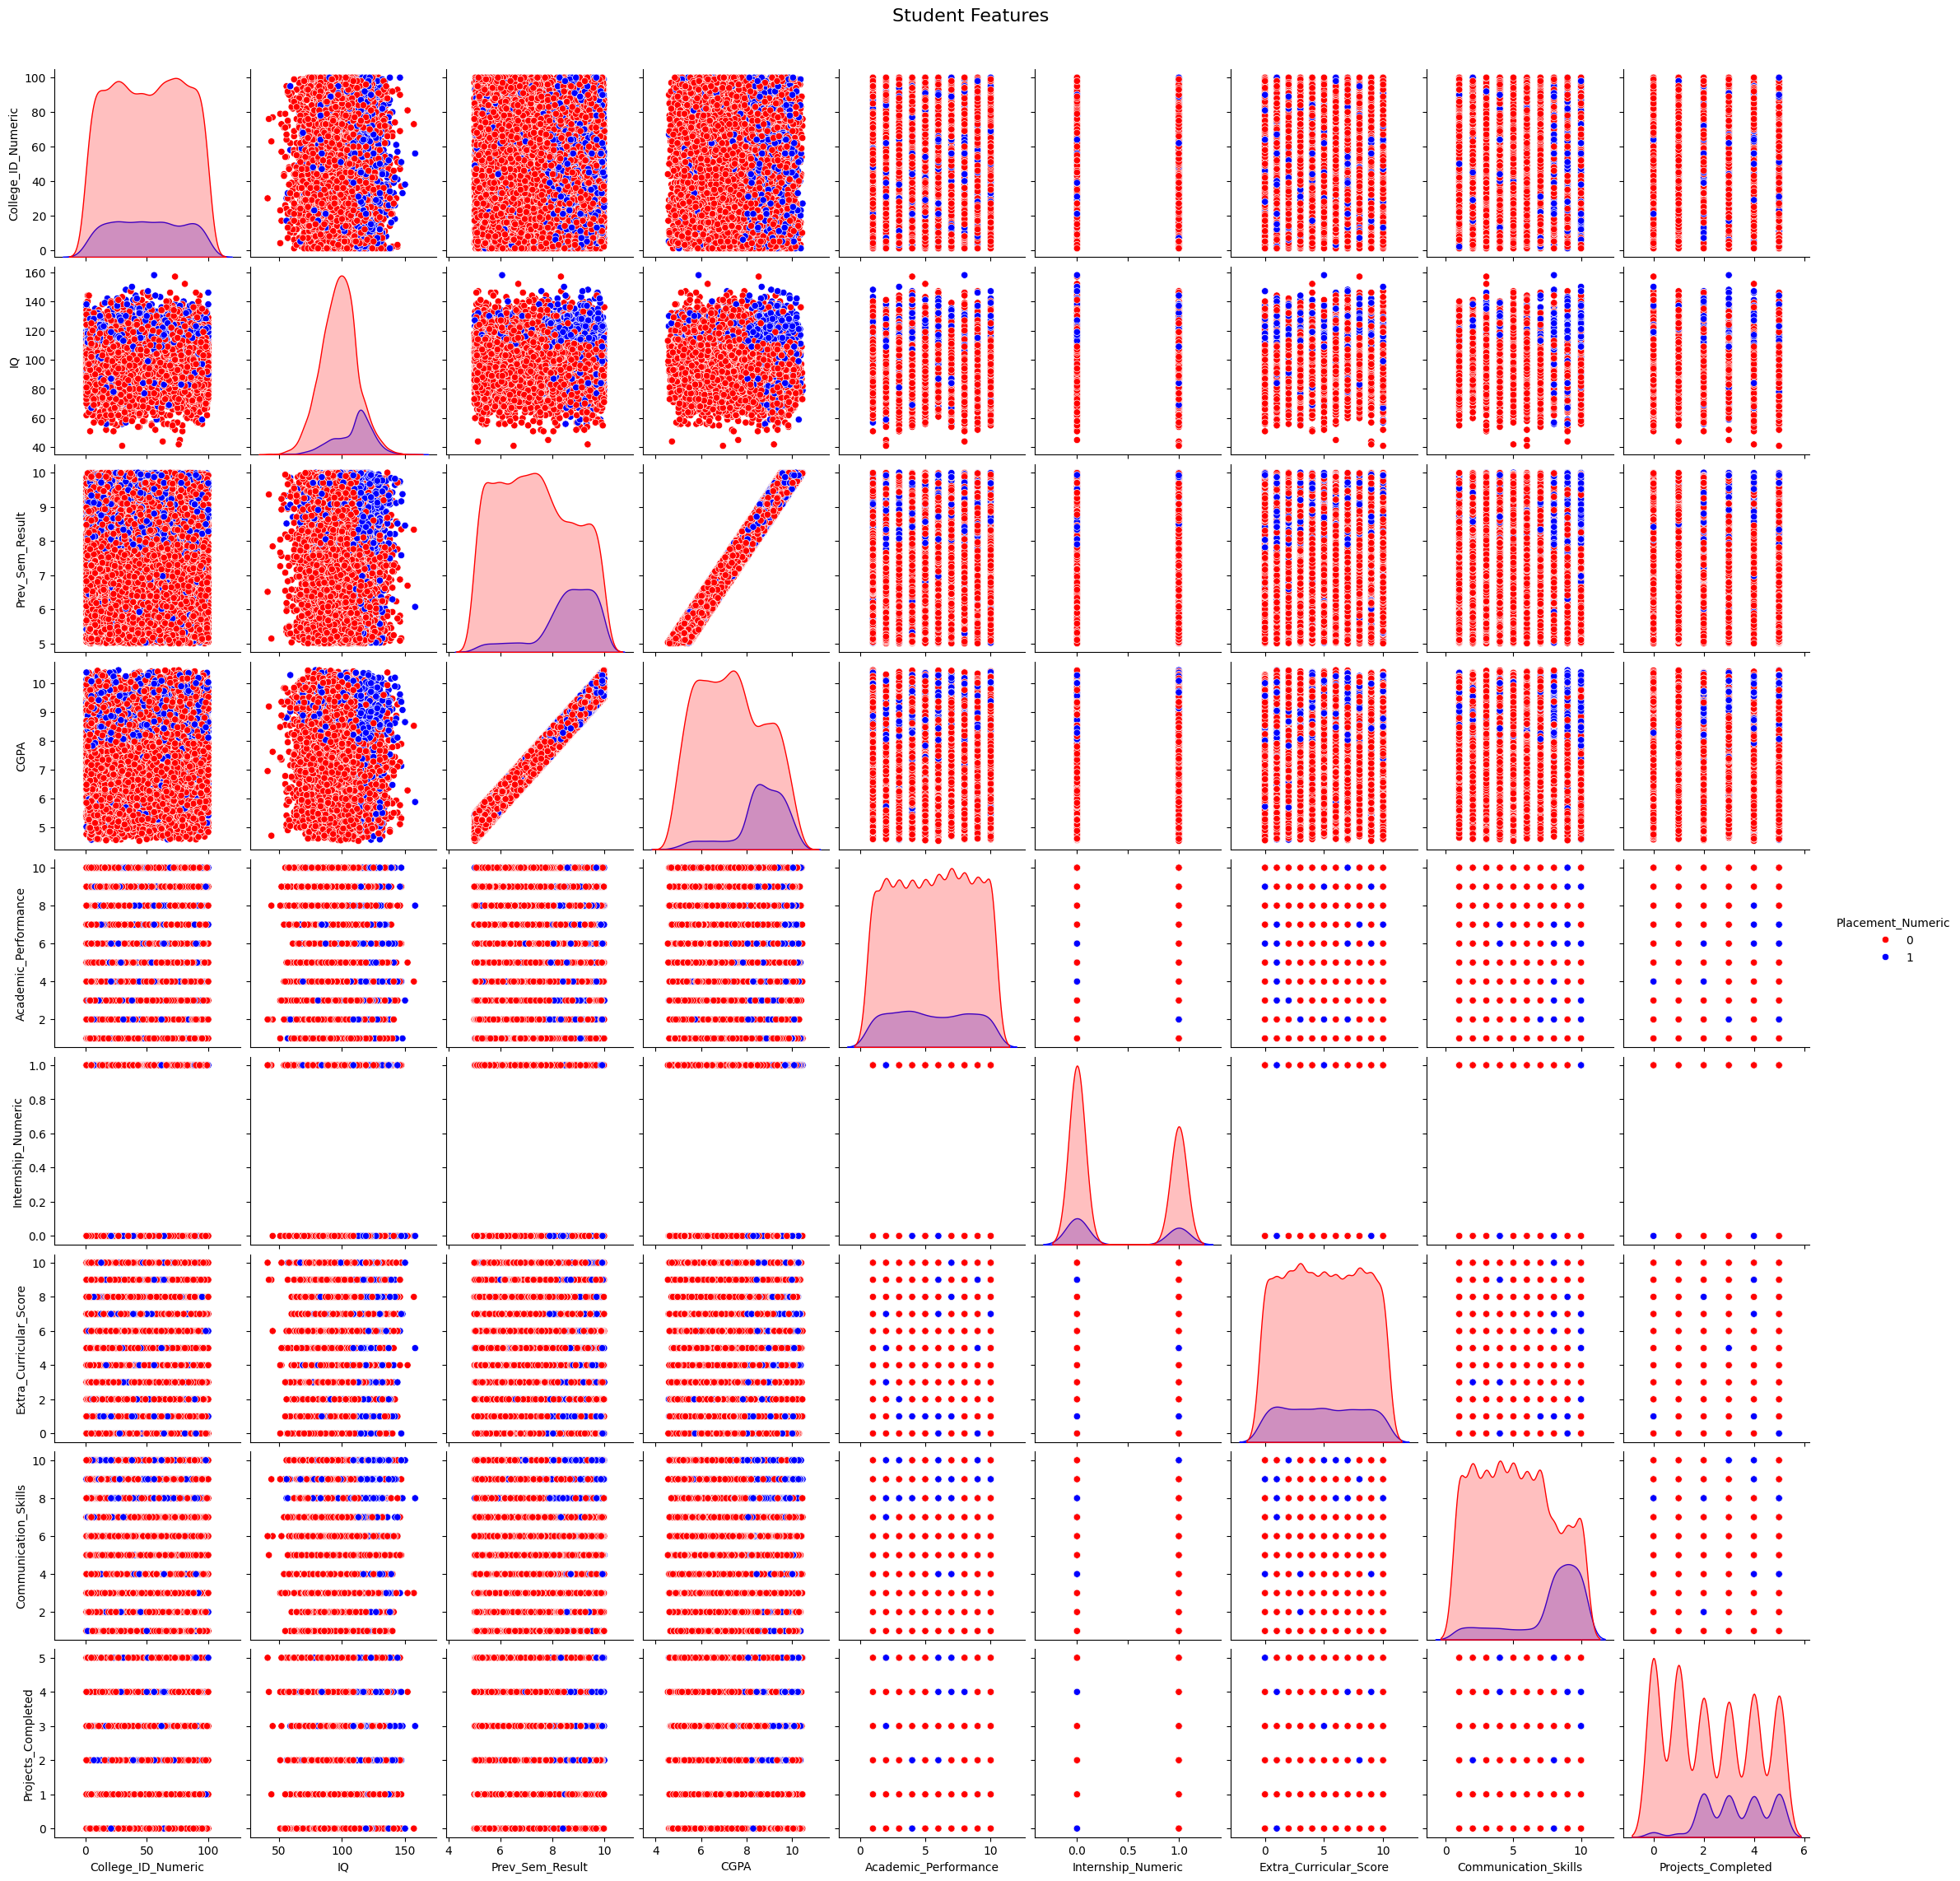

In [26]:
# Use sns.pariplot to visualize.

plot_features = ['College_ID_Numeric', 'IQ', 'Prev_Sem_Result',
                'CGPA', 'Academic_Performance','Internship_Numeric',     
                'Extra_Curricular_Score', 'Communication_Skills', 
                'Projects_Completed', 'Placement_Numeric'
]

df_plot = df[plot_features]

plt.figure(figsize=(13, 8))
sns.pairplot(
    df_plot, 
    hue='Placement_Numeric', 
    palette={0: 'red', 1: 'blue'},
)

plt.suptitle('Student Features', y=1.02, fontsize=16)
plt.show()

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [24]:
# Set X to the desired features.
X = df[['IQ', 'Internship_Numeric']]

# Set y to be our target variable. 
y = df['Placement_Numeric']

print(X.head())
print(y.head())

    IQ  Internship_Numeric
0  107                   0
1   97                   0
2  109                   0
3  122                   1
4   96                   0
0    0
1    0
2    0
3    0
4    0
Name: Placement_Numeric, dtype: int64


## Split to Testing and Training Datasets 

In [ ]:
# Split our data into testing and training pairs.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     
print('Length of our Training data:', X_train.shape, 
      '\nLength of our Testing data:', X_test.shape)

# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape)
print('y_test: %d rows, 1 column' % y_test.shape)

Length of our Training data: (8000, 2) 
Length of our Testing data: (2000, 2)
X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [28]:
# Initalize our logistic regressionmodel.

model = LogisticRegression()

print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [30]:
# 1. Make predictions of your test data and save them as `y_pred`. 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [32]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score: %f' % f1)

Accuracy Score: 0.835500
Precision Score: 0.360000
Recall Score: 0.027950
F1 Score: 0.051873


Plot a confusion matrix of your predicted results.

Text(70.72222222222221, 0.5, 'Actual')

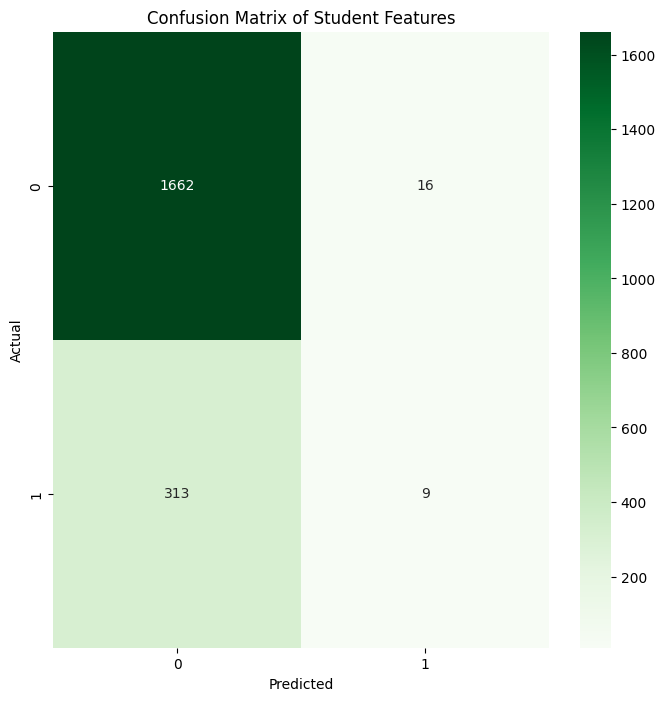

In [35]:
# 3. Plot a confusion matrix of your predicted results.

cm = confusion_matrix(y_test, y_pred)

cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Student Features")
plt.xlabel('Predicted')
plt.ylabel('Actual')

How many true positives and true negatives did your model get?

In [36]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1662
True Positives: 9


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [37]:
# Add a constant term to the independent variables.
X_const = sm.add_constant(X, prepend=False)

# Fit the model.
sm_model = sm.Logit(y, X_const)
result = sm_model.fit()

# Print the summary and interpret the results.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Placement_Numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        02:19:50   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
IQ                     0.0562      0.002     27.154      0.000       0.052       0.060
Inter

# Extra Credit: Use your brain and make a better model (as in better scores).



Length of our Training data: (8000, 2) 
Length of our Testing data: (2000, 2)
X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column
Length of new Training data: (8000, 4) 
Length of new Testing data: (2000, 4)
X_train_new: 8000 rows, 4 columns
X_test_new: 2000 rows, 4 columns
y_train_new: 8000 rows, 1 column
y_test_new: 2000 rows, 1 column
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy Score: 0.847000
Precision Score: 0.568862
Recall Score: 0.288754
F1 Score: 0.383065


Text(70.72222222222221, 0.5, 'Actual')

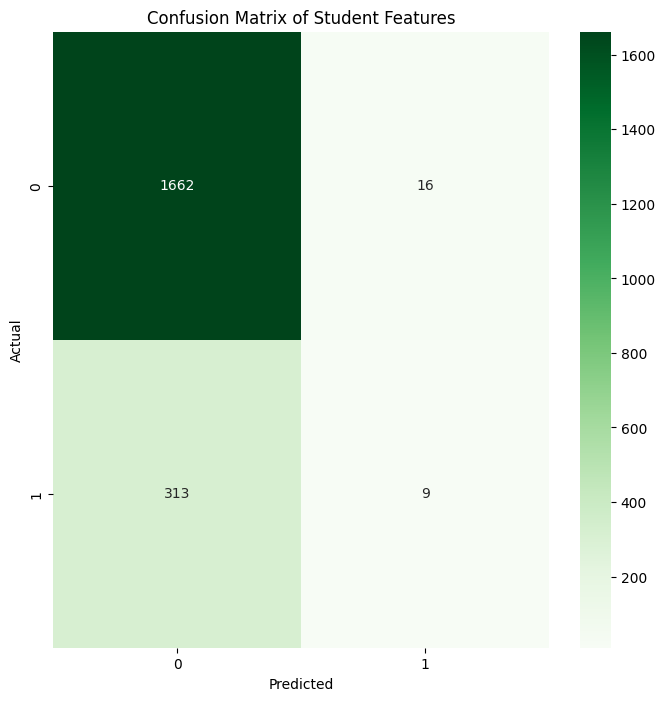

In [ ]:
# Define the new X variable, and reuse the same y variable from before.
X_new = df[['IQ', 'CGPA', 'Internship_Numeric','Projects_Completed']]

# Split our data into testing and training. Remember to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     
print('Length of our Training data:', X_train.shape, 
      '\nLength of our Testing data:', X_test.shape)

# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape)
print('y_test: %d rows, 1 column' % y_test.shape)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, 
    y, 
    test_size=0.2     
) 

print('Length of new Training data:', X_train_new.shape, 
      '\nLength of new Testing data:', X_test_new.shape)

print('X_train_new: %d rows, %d columns' % X_train_new.shape)
print('X_test_new: %d rows, %d columns' % X_test_new.shape)
print('y_train_new: %d rows, 1 column' % y_train_new.shape)
print('y_test_new: %d rows, 1 column' % y_test_new.shape)

# Initalize our model.
model_new = LogisticRegression()

print(type(model_new))

# Fit-train our model using our training data.
model_new.fit(X_train_new, y_train_new)

# Make new predicitions using our testing data. 
y_pred_new = model_new.predict(X_test_new)

# Print each of our scores to inspect performance.
accuracy = accuracy_score(y_test_new, y_pred_new)
precision = precision_score(y_test_new, y_pred_new)
recall = recall_score(y_test_new, y_pred_new)
f1 = f1_score(y_test_new, y_pred_new)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score: %f' % f1)

# Plot the confusion matrix.
cm_new = confusion_matrix(y_test_new, y_pred_new)

cm_new = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test_new, y_pred_new).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm_new, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Student Features")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Old Scores
Accuracy Score: 0.835500
Precision Score: 0.360000
Recall Score: 0.027950
F1 Score: 0.051873

# New Scores
Accuracy Score: 0.847000
Precision Score: 0.568862
Recall Score: 0.288754
F1 Score: 0.383065